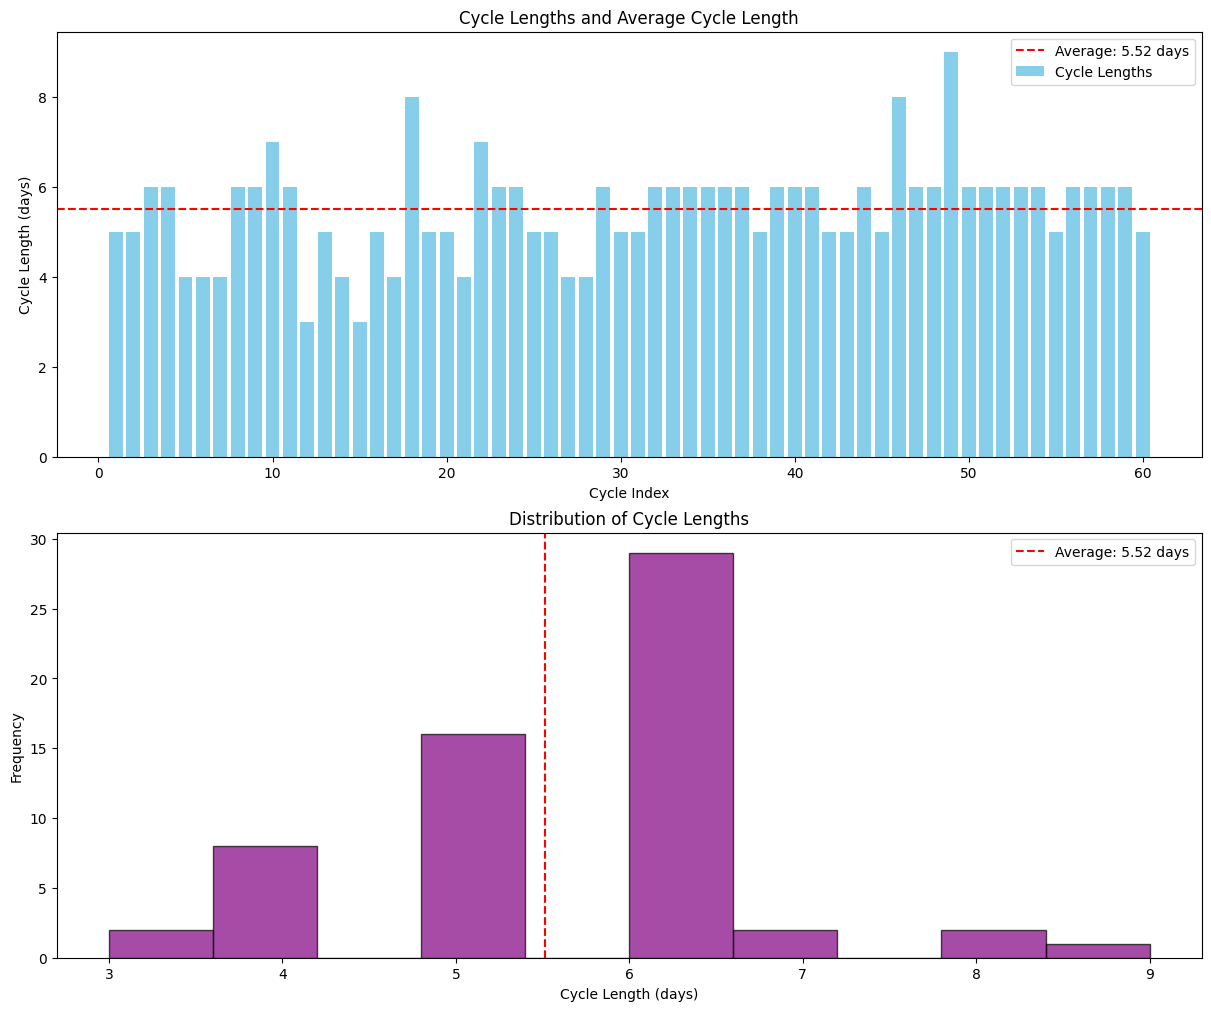

In [4]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Load the JSON data
with open('cycle_data.json', 'r') as file:
    cycle_data = json.load(file)

# Calculate cycle lengths
cycle_lengths = []
for cycle in cycle_data:
    start_date = datetime.strptime(cycle["period_start_date"], "%Y-%m-%d %H:%M:%S.%f")
    end_date = datetime.strptime(cycle["period_end_date"], "%Y-%m-%d %H:%M:%S.%f")
    cycle_length = (end_date - start_date).days
    cycle_lengths.append(cycle_length)

# Calculate the average length
average_length = sum(cycle_lengths) / len(cycle_lengths)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)

# Bar Chart (First Chart)
axs[0].bar(range(1, len(cycle_lengths) + 1), cycle_lengths, color='skyblue', label="Cycle Lengths")
axs[0].axhline(y=average_length, color='red', linestyle='--', label=f'Average: {average_length:.2f} days')
axs[0].set_xlabel("Cycle Index")
axs[0].set_ylabel("Cycle Length (days)")
axs[0].set_title("Cycle Lengths and Average Cycle Length")
axs[0].legend()

# Histogram (Second Chart)
axs[1].hist(cycle_lengths, bins=10, color='purple', alpha=0.7, edgecolor='black')
axs[1].axvline(x=average_length, color='red', linestyle='--', label=f'Average: {average_length:.2f} days')
axs[1].set_xlabel("Cycle Length (days)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Cycle Lengths")
axs[1].legend()

# Show the combined chart
plt.show()


/tmp/ipykernel_1600/1081446322.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=years, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))


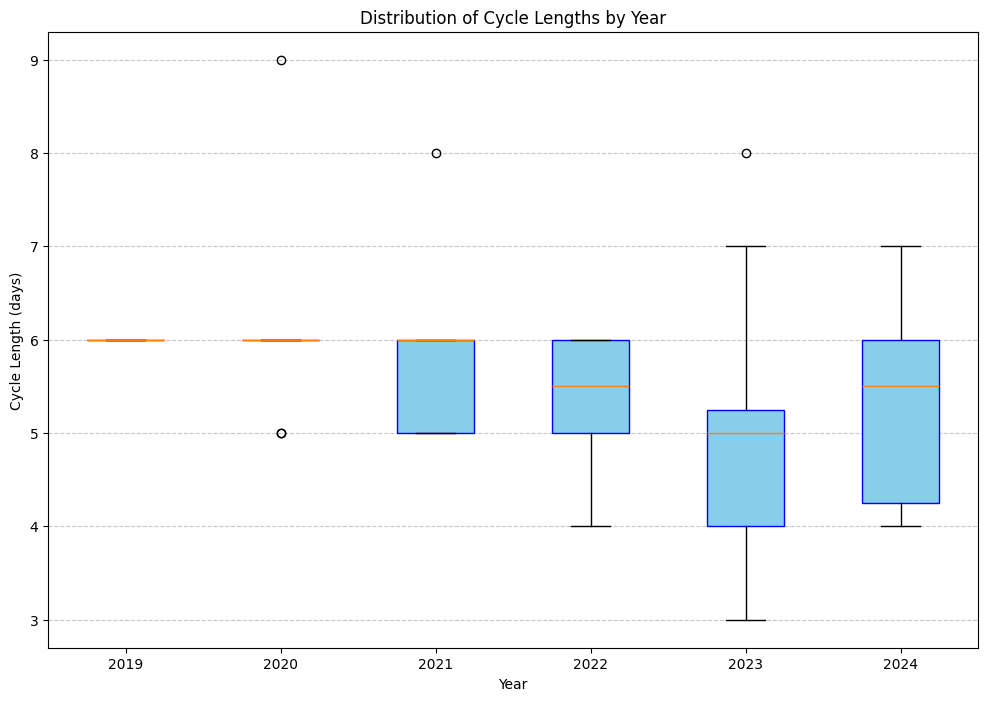

In [4]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the JSON data
with open('cycle_data.json', 'r') as file:
    cycle_data = json.load(file)

# Group cycle lengths by year
yearly_cycles = defaultdict(list)

for cycle in cycle_data:
    start_date = datetime.strptime(cycle["period_start_date"], "%Y-%m-%d %H:%M:%S.%f")
    end_date = datetime.strptime(cycle["period_end_date"], "%Y-%m-%d %H:%M:%S.%f")
    cycle_length = (end_date - start_date).days
    year = start_date.year  # Group by year
    yearly_cycles[year].append(cycle_length)

# Prepare data for the box plot
years = sorted(yearly_cycles.keys())
data = [yearly_cycles[year] for year in years]

# Create the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=years, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cycle Length (days)')
plt.title('Distribution of Cycle Lengths by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


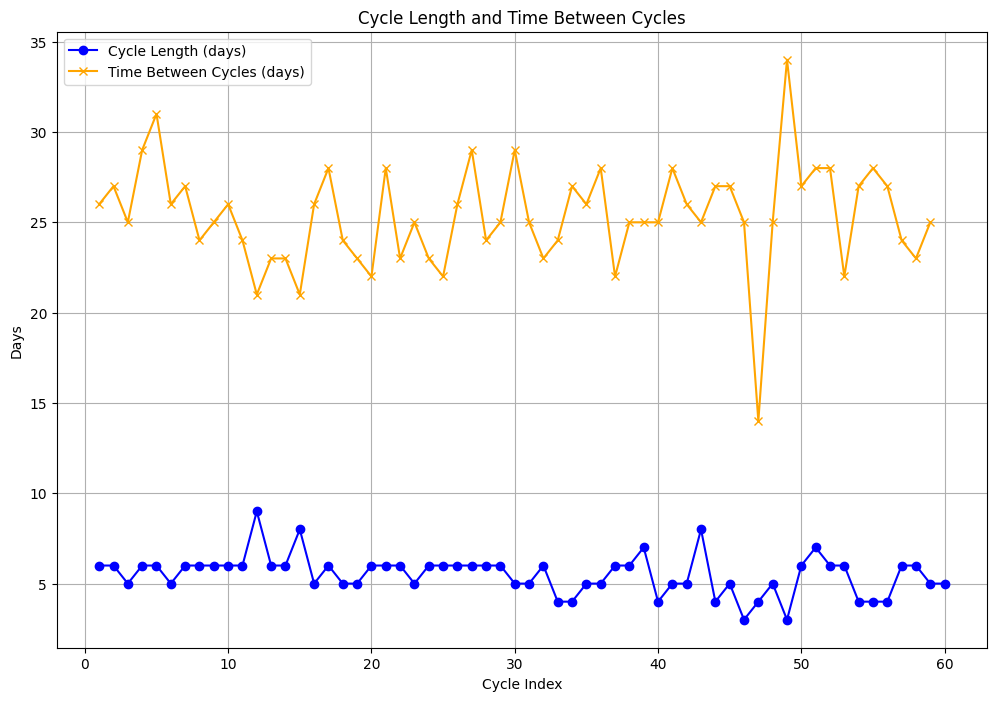

In [7]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Load the JSON data
with open('cycle_data.json', 'r') as file:
    cycle_data = json.load(file)

# Sort the data by period_start_date
cycle_data.sort(key=lambda x: datetime.strptime(x["period_start_date"], "%Y-%m-%d %H:%M:%S.%f"))

# Calculate cycle lengths and gaps
cycle_lengths = []
cycle_gaps = []

for i in range(len(cycle_data)):
    start_date = datetime.strptime(cycle_data[i]["period_start_date"], "%Y-%m-%d %H:%M:%S.%f")
    end_date = datetime.strptime(cycle_data[i]["period_end_date"], "%Y-%m-%d %H:%M:%S.%f")
    
    # Calculate cycle length
    cycle_length = (end_date - start_date).days
    cycle_lengths.append(cycle_length)
    
    # Calculate gap to next cycle
    if i < len(cycle_data) - 1:
        next_start_date = datetime.strptime(cycle_data[i + 1]["period_start_date"], "%Y-%m-%d %H:%M:%S.%f")
        gap = (next_start_date - end_date).days
        cycle_gaps.append(gap)
    else:
        cycle_gaps.append(None)  # No gap for the last cycle

# Plot the chart
plt.figure(figsize=(12, 8))

# Plot cycle lengths
plt.plot(range(1, len(cycle_lengths) + 1), cycle_lengths, marker='o', label='Cycle Length (days)', color='blue')

# Plot cycle gaps
plt.plot(range(1, len(cycle_gaps) + 1), cycle_gaps, marker='x', label='Time Between Cycles (days)', color='orange')

# Add labels and title
plt.xlabel('Cycle Index')
plt.ylabel('Days')
plt.title('Cycle Length and Time Between Cycles')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()
